In [1]:
import pandas as pd

## Train data

In [2]:
train_df = pd.read_csv("./data/train.csv")

In [3]:
train_df.columns

Index(['customer_id', 'firstname', 'lastname', 'record_number',
       'days_since_opened', 'days_since_confirmed', 'primary_term',
       'final_term', 'days_till_primary_close', 'days_till_final_close',
       'loans_credit_limit', 'loans_next_payment_summary',
       'loans_outstanding_balance', 'loans_max_overdue_amount',
       'loans_credit_cost_rate', 'loans_within_5_days',
       'loans_within_5_to_30_days', 'loans_within_30_to_60_days',
       'loans_within_60_to_90_days', 'loans_over_90_days',
       'is_zero_loans_within_5_days', 'is_zero_loans_within_5_to_30_days',
       'is_zero_loans_within_30_to_60_days',
       'is_zero_loans_within_60_to_90_days', 'is_zero_loans_over_90_days',
       'utilization', 'over_limit_count', 'max_over_limit_count',
       'is_zero_utilization', 'is_zero_over_limit_count',
       'is_zero_max_over_limit_count', 'encoded_payment_0',
       'encoded_payment_1', 'encoded_payment_2', 'encoded_payment_3',
       'encoded_payment_4', 'encoded_payme

In [11]:
train_df.shape

(1106674, 62)

In [8]:
train_df.isna().sum().head(60)

customer_id                               0
firstname                                 0
lastname                                  0
record_number                             0
days_since_opened                         0
days_since_confirmed                      0
primary_term                              0
final_term                                0
days_till_primary_close                   0
days_till_final_close                     0
loans_credit_limit                        0
loans_next_payment_summary                0
loans_outstanding_balance                 0
loans_max_overdue_amount                  0
loans_credit_cost_rate                    0
loans_within_5_days                       0
loans_within_5_to_30_days                 0
loans_within_30_to_60_days                0
loans_within_60_to_90_days                0
loans_over_90_days                        0
is_zero_loans_within_5_days               0
is_zero_loans_within_5_to_30_days         0
is_zero_loans_within_30_to_60_da

In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106674 entries, 0 to 1106673
Data columns (total 62 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   customer_id                         1106674 non-null  object 
 1   firstname                           1106674 non-null  object 
 2   lastname                            1106674 non-null  object 
 3   record_number                       1106674 non-null  int64  
 4   days_since_opened                   1106674 non-null  int64  
 5   days_since_confirmed                1106674 non-null  int64  
 6   primary_term                        1106674 non-null  int64  
 7   final_term                          1106674 non-null  int64  
 8   days_till_primary_close             1106674 non-null  int64  
 9   days_till_final_close               1106674 non-null  int64  
 10  loans_credit_limit                  1106674 non-null  int64  
 11  loans_next_

## Correlation map

In [27]:
## Required libraries 
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/p7/zprxlwg93f381k4p91z4b2l00000gn/T/ipykernel_67332/2736766943.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_corr_matrix = train_df.corr()


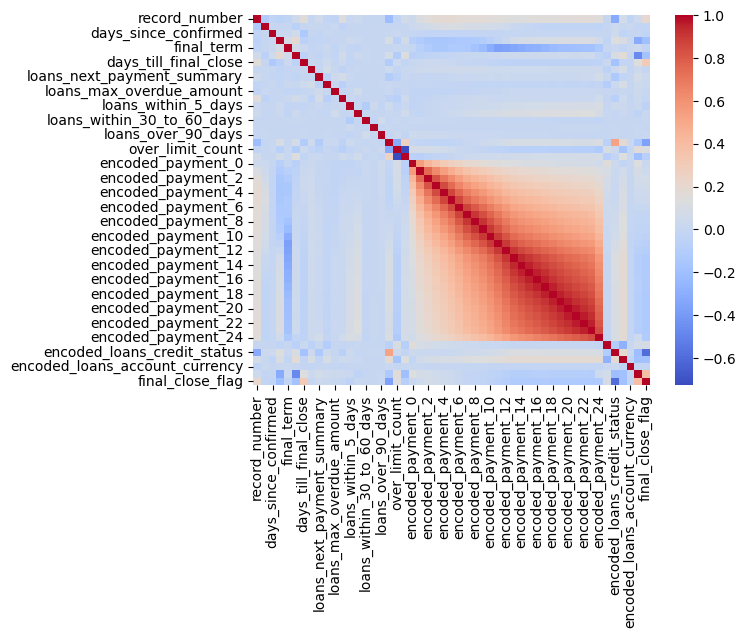

In [35]:
train_corr_matrix = train_df.corr()
sns.heatmap(train_corr_matrix, cmap='coolwarm')
plt.show()

## Function to replace with median values

In [48]:
import pandas as pd

def replace_null_with_median(dataframe):
    # Calculate the median for each column
    median_values = dataframe.median()
    
    # Replace null values with the respective column's median
    dataframe = dataframe.fillna(median_values)
    
    return dataframe

### Treating nulls

In [49]:
for i in range(0,25):
    train_df[f"encoded_payment_{i}"] = replace_null_with_median(train_df[f"encoded_payment_{i}"])

In [51]:
train_df.isna().sum().sum()

0

## Revealition - Customer ID is duplicated

In [52]:
train_df["customer_id"].duplicated().sum()

1008298

In [53]:
train_df["customer_id"].nunique()

98376

In [57]:
train_df.groupby(["customer_id", "record_number"], as_index = False)["primary_close_flag"].count()

,customer_id,record_number,primary_close_flag
0,0001a90c-2638-435a-b6c9-19ab2b826ab2,1,1
1,0001a90c-2638-435a-b6c9-19ab2b826ab2,2,1
2,0001a90c-2638-435a-b6c9-19ab2b826ab2,3,1
3,0001a90c-2638-435a-b6c9-19ab2b826ab2,5,1
4,0001a90c-2638-435a-b6c9-19ab2b826ab2,6,1
...,...,...,...
1106669,ffffdbe4-0103-4f01-ad7c-fdd2f52dbb43,7,1
1106670,ffffdbe4-0103-4f01-ad7c-fdd2f52dbb43,8,1
1106671,ffffdbe4-0103-4f01-ad7c-fdd2f52dbb43,9,1
1106672,ffffdbe4-0103-4f01-ad7c-fdd2f52dbb43,10,1


In [54]:
test_df["customer_id"].nunique()

97704

In [55]:
test_df.shape

(474289, 60)

## PCA to reduce the dimensions

### Creating a primary key

In [62]:
train_df["primary_key"] = train_df["customer_id"] + "_" + train_df["record_number"].astype("str")

### Filtering numerical columns

In [64]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106674 entries, 0 to 1106673
Data columns (total 63 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   customer_id                         1106674 non-null  object 
 1   firstname                           1106674 non-null  object 
 2   lastname                            1106674 non-null  object 
 3   record_number                       1106674 non-null  int64  
 4   days_since_opened                   1106674 non-null  int64  
 5   days_since_confirmed                1106674 non-null  int64  
 6   primary_term                        1106674 non-null  int64  
 7   final_term                          1106674 non-null  int64  
 8   days_till_primary_close             1106674 non-null  int64  
 9   days_till_final_close               1106674 non-null  int64  
 10  loans_credit_limit                  1106674 non-null  int64  
 11  loans_next_

In [68]:
train_df[["is_zero_loans_within_5_days", "loans_within_5_days", "customer_id", "record_number"]].sort_values(["loans_within_5_days","customer_id", "record_number"])

,is_zero_loans_within_5_days,loans_within_5_days,customer_id,record_number
915417,No,0,000e4fad-b42c-4f0b-89f2-26efeb0c2677,8
865848,No,0,0040fc3c-2d6f-4514-ae51-8a722cca94f7,15
1061868,No,0,0050b217-2233-446d-9232-55d94d436b1c,10
749632,No,0,00732a5a-935f-4df6-a581-bd080a502ebb,2
887184,No,0,00732a5a-935f-4df6-a581-bd080a502ebb,3
...,...,...,...,...
332395,No,16,e27483fe-612e-4803-83bf-484bafbf12e0,3
388856,No,16,eac7c258-add3-4e8b-8df9-0dcf873d4e61,2
471060,No,16,eb0c5885-a692-4958-842f-abf5b0d6b3ee,8
590783,No,16,ef62cdd7-5ddd-41fe-98c0-bdd2a5fe06a5,9


> These fields seem to be repititive and can be removed

> Removing all the boolean columns from the analysis

### Identifying all the columns containing "is_"

In [84]:
[element for element in train_df.columns if "is_" not in element]

['customer_id',
 'firstname',
 'lastname',
 'record_number',
 'days_since_opened',
 'days_since_confirmed',
 'primary_term',
 'final_term',
 'days_till_primary_close',
 'days_till_final_close',
 'loans_credit_limit',
 'loans_next_payment_summary',
 'loans_outstanding_balance',
 'loans_max_overdue_amount',
 'loans_credit_cost_rate',
 'loans_within_5_days',
 'loans_within_5_to_30_days',
 'loans_within_30_to_60_days',
 'loans_within_60_to_90_days',
 'loans_over_90_days',
 'utilization',
 'over_limit_count',
 'max_over_limit_count',
 'encoded_payment_0',
 'encoded_payment_1',
 'encoded_payment_2',
 'encoded_payment_3',
 'encoded_payment_4',
 'encoded_payment_5',
 'encoded_payment_6',
 'encoded_payment_7',
 'encoded_payment_8',
 'encoded_payment_9',
 'encoded_payment_10',
 'encoded_payment_11',
 'encoded_payment_12',
 'encoded_payment_13',
 'encoded_payment_14',
 'encoded_payment_15',
 'encoded_payment_16',
 'encoded_payment_17',
 'encoded_payment_18',
 'encoded_payment_19',
 'encoded_payme

In [85]:
x_labels = ['days_since_opened',
 'days_since_confirmed',
 'primary_term',
 'final_term',
 'days_till_primary_close',
 'days_till_final_close',
 'loans_credit_limit',
 'loans_next_payment_summary',
 'loans_outstanding_balance',
 'loans_max_overdue_amount',
 'loans_credit_cost_rate',
 'loans_within_5_days',
 'loans_within_5_to_30_days',
 'loans_within_30_to_60_days',
 'loans_within_60_to_90_days',
 'loans_over_90_days',
 'utilization',
 'over_limit_count',
 'max_over_limit_count',
 'encoded_payment_0',
 'encoded_payment_1',
 'encoded_payment_2',
 'encoded_payment_3',
 'encoded_payment_4',
 'encoded_payment_5',
 'encoded_payment_6',
 'encoded_payment_7',
 'encoded_payment_8',
 'encoded_payment_9',
 'encoded_payment_10',
 'encoded_payment_11',
 'encoded_payment_12',
 'encoded_payment_13',
 'encoded_payment_14',
 'encoded_payment_15',
 'encoded_payment_16',
 'encoded_payment_17',
 'encoded_payment_18',
 'encoded_payment_19',
 'encoded_payment_20',
 'encoded_payment_21',
 'encoded_payment_22',
 'encoded_payment_23',
 'encoded_payment_24',
 'encoded_loans_account_holder_type',
 'encoded_loans_credit_status',
 'encoded_loans_credit_type',
 'encoded_loans_account_currency',
#  'primary_close_flag',
#  'final_close_flag',
#  'primary_key'
]

### Test train split

In [87]:
from sklearn.model_selection import train_test_split
X, y = train_df[x_labels], train_df["primary_close_flag"]

# Step 3: Split the dataset into training and testing sets
test_size = 0.3  # You can adjust the test size as needed (e.g., 0.2 for an 80-20 split)
random_state = 42  # Set a random seed for reproducibility

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)


In [88]:
X_train

,days_since_opened,days_since_confirmed,primary_term,final_term,days_till_primary_close,days_till_final_close,loans_credit_limit,loans_next_payment_summary,loans_outstanding_balance,loans_max_overdue_amount,...,encoded_payment_19,encoded_payment_20,encoded_payment_21,encoded_payment_22,encoded_payment_23,encoded_payment_24,encoded_loans_account_holder_type,encoded_loans_credit_status,encoded_loans_credit_type,encoded_loans_account_currency
610038,11,0,2,8,1,11,0,5,5,2,...,3.0,4.0,3.0,3.0,3.0,4.0,1,2,4,1
422640,5,12,17,8,7,11,17,1,3,2,...,3.0,4.0,3.0,3.0,3.0,4.0,1,2,3,1
271848,16,7,15,12,4,9,1,2,3,3,...,3.0,4.0,3.0,3.0,3.0,4.0,1,3,4,1
48433,19,0,1,8,14,11,9,3,5,2,...,3.0,4.0,3.0,3.0,3.0,4.0,1,2,4,1
761356,2,16,10,13,14,8,6,2,3,2,...,3.0,4.0,3.0,3.0,3.0,4.0,1,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,9,13,3,3,2,6,9,2,3,2,...,3.0,4.0,3.0,3.0,3.0,4.0,1,3,4,1
259178,0,4,13,0,13,3,6,2,3,2,...,3.0,4.0,3.0,3.0,3.0,4.0,1,3,4,1
131932,17,3,14,15,14,14,7,2,3,2,...,3.0,4.0,3.0,3.0,3.0,4.0,1,3,4,1
671155,14,11,14,7,16,7,14,2,3,2,...,0.0,1.0,0.0,0.0,0.0,1.0,1,3,4,1


In [90]:
y_train.value_counts()

0    675300
1     99371
Name: primary_close_flag, dtype: int64

## Random forest - CV

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
# from sklearn.datasets import load_iris  # Replace with your dataset

# # Step 2: Load your dataset (replace with your own data loading)
# data = load_iris()
# X = data.data
# y = data.target

# Step 4: Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 5: Set up cross-validation (e.g., 5-fold cross-validation)
num_folds = 5


X, y = X_train, y_train
# Step 6: Train and evaluate the model using cross-validation
cross_val_scores = cross_val_score(rf_classifier, X, y, cv=4)

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)

# Optionally, you can calculate and print the mean and standard deviation of the scores
print("Mean CV Score:", cross_val_scores.mean())
print("Standard Deviation of CV Scores:", cross_val_scores.std())

Cross-Validation Scores: [0.99986575 0.9998864  0.99991222 0.99989673]
Mean CV Score: 0.9998902760093691
Standard Deviation of CV Scores: 1.6880250409849012e-05


### Fitting the mode on entire data (X, y - full train set) directly

In [94]:
from sklearn.metrics import roc_auc_score

In [95]:
rf_classifier.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]  # Probability of class 1

# Step 6: Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9999993264159752


## Fitting on entire data

In [96]:
rf_classifier.fit(X, y)

# Step 5: Make predictions on the test set
# y_pred_proba = rf_classifier.predict_proba(X)[:, 1]  # Probability of class 1

# # Step 6: Calculate the ROC AUC score
# roc_auc = roc_auc_score(y_test, y_pred_proba)
# print("ROC AUC Score:", roc_auc)

RandomForestClassifier(random_state=42)

In [98]:
y_test

682142    1
306955    0
436486    0
178546    0
359338    0
         ..
678084    0
938758    0
307077    0
128314    0
994949    0
Name: primary_close_flag, Length: 332003, dtype: int64

In [97]:
y_pred_proba

array([1.  , 0.  , 0.04, ..., 0.  , 0.  , 0.  ])

### fitting on final_close_flag

In [117]:

X, y_final_close = train_df[x_labels], train_df["final_close_flag"]

In [118]:
rf_classifier_final_close = RandomForestClassifier(n_estimators=100, random_state=42)

In [119]:
rf_classifier_final_close.fit(X, y_final_close)

RandomForestClassifier(random_state=42)

## Preprocessing Test data

### STEP 1: Treating nulls

In [100]:
test_df.isna().sum().sum()

389112

In [102]:
for i in range(0,25):
    test_df[f"encoded_payment_{i}"] = replace_null_with_median(test_df[f"encoded_payment_{i}"])

In [103]:
test_df.isna().sum().sum()

0

### STEP 2: Creating a primary key

In [104]:
test_df["primary_key"] = test_df["customer_id"] + "_" + test_df["record_number"].astype("str")

### STEP 3: X_labels

In [106]:
X = test_df[x_labels]

In [107]:
rf_classifier.predict(X)

array([0, 0, 0, ..., 0, 0, 0])

In [111]:
submission_df["primary_close_flag"] = rf_classifier.predict(X)

In [113]:
submission_df["primary_close_flag"].sum()

60946

### STEP 4 : Fitting on final_close_flag

In [120]:
X = test_df[x_labels]

In [121]:
submission_df["final_close_flag"] = rf_classifier_final_close.predict(X)

In [123]:
submission_df["final_close_flag"].sum()

91212

### STEP 5: exporting the values

In [125]:
submission_df.to_csv('my_submission_file.csv', index=False)

In [14]:
## train_df.loc[~train_df["encoded_payment_1"].isna(), :].isna().sum().head(60)
## This means that the nulls are spread across encoded payments

In [16]:
submission_df = pd.read_csv("./data/submission.csv")

In [15]:
submission_df

,primary_close_flag,final_close_flag
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
474284,0,0
474285,0,0
474286,0,0
474287,0,0


In [17]:
test_df = pd.read_csv("./data/test.csv")

In [19]:
test_df.columns

Index(['customer_id', 'firstname', 'lastname', 'record_number',
       'days_since_opened', 'days_since_confirmed', 'primary_term',
       'final_term', 'days_till_primary_close', 'days_till_final_close',
       'loans_credit_limit', 'loans_next_payment_summary',
       'loans_outstanding_balance', 'loans_max_overdue_amount',
       'loans_credit_cost_rate', 'loans_within_5_days',
       'loans_within_5_to_30_days', 'loans_within_30_to_60_days',
       'loans_within_60_to_90_days', 'loans_over_90_days',
       'is_zero_loans_within_5_days', 'is_zero_loans_within_5_to_30_days',
       'is_zero_loans_within_30_to_60_days',
       'is_zero_loans_within_60_to_90_days', 'is_zero_loans_over_90_days',
       'utilization', 'over_limit_count', 'max_over_limit_count',
       'is_zero_utilization', 'is_zero_over_limit_count',
       'is_zero_max_over_limit_count', 'encoded_payment_0',
       'encoded_payment_1', 'encoded_payment_2', 'encoded_payment_3',
       'encoded_payment_4', 'encoded_payme

In [20]:
train_df.columns

Index(['customer_id', 'firstname', 'lastname', 'record_number',
       'days_since_opened', 'days_since_confirmed', 'primary_term',
       'final_term', 'days_till_primary_close', 'days_till_final_close',
       'loans_credit_limit', 'loans_next_payment_summary',
       'loans_outstanding_balance', 'loans_max_overdue_amount',
       'loans_credit_cost_rate', 'loans_within_5_days',
       'loans_within_5_to_30_days', 'loans_within_30_to_60_days',
       'loans_within_60_to_90_days', 'loans_over_90_days',
       'is_zero_loans_within_5_days', 'is_zero_loans_within_5_to_30_days',
       'is_zero_loans_within_30_to_60_days',
       'is_zero_loans_within_60_to_90_days', 'is_zero_loans_over_90_days',
       'utilization', 'over_limit_count', 'max_over_limit_count',
       'is_zero_utilization', 'is_zero_over_limit_count',
       'is_zero_max_over_limit_count', 'encoded_payment_0',
       'encoded_payment_1', 'encoded_payment_2', 'encoded_payment_3',
       'encoded_payment_4', 'encoded_payme